# Py(phar)maceuticals

### Load Data

* Load the datasets: Mouse_metadata.csv and Study_results.csv

### Analysis

1. [Cleaning Data](#Cleaning_Data)

2. Summary for Tumor Volume vs. Treatment: [Summary Statistics](#Summary_Statistics)

3. The Number of Mice for Treatment: [Bar Plot](#Bar_Plot)

4. Mice Sex Distritubion: [Pie Plot](#Pie_Plot)

5. Final Tumor Volume: [Box Plot](#Box_Plot)

6. Tumor Volume Changes: [Line Plot](#Line_Plot)

7. Weight vs. Average Tumor Volume: [Scatter Plot](#Scatter_Plot)

8. Weight vs. Average Tumor Volume: [Correlation & Regression](#Regression)

### Observations and Insights


* The Summary Statistics table shows that the mice with the Remicane treatment has the smallest average tumor volume. The mice with the Capomulin treatment has the next smallest tumor volume. The standard variations of them are also smallest.

    - Ramicane and Capomulin seems most promising treatments.
    

* The Bar Plot shows that, throughout the course of the study, the total number of mice with Capomulin is the most. The Ramicane treatment is ranked the second with small difference.

    - Most mice treated with Capomulin and Ramicane could live much longer.
    

* The Box Plot shows that (1) The final volumes by Capumulin and Ramicane have central tendency with small IQR (2) the maximum volumes of Capumulin and Ramicane are similar to the minimum volumes of Infubinol and Ceftamin (3) the upper and lower quartiles appear similar in Capomulin and Ramicane.

    - The mice treated with Capumulin or Ramicane have much smaller tumor at the final timepoint than the mice treated with Infubinol or Ceftamin. The performance of Capumulin and Ramicane seems similar.
    

* The Scatter Plot shows that the tumor size is proportional to the mice weight with positive correlation. The Pearson correlation is 0.84.

    - The mice with more weight tends to have bigger tumor.

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

## Load Data

In [2]:
# Data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
print(f"* The number of rows is {mouse_metadata.shape[0]}\n")
print(f"* The numbers of unique items are")
print(mouse_metadata.nunique())
mouse_metadata.head()

* The number of rows is 249

* The numbers of unique items are
Mouse ID        249
Drug Regimen     10
Sex               2
Age_months       24
Weight (g)       16
dtype: int64


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
print(f"* The number of rows is {study_results.shape[0]}\n")
print(f"* The numbers of unique items are")
print(study_results.nunique())
study_results.head()

* The number of rows is 1893

* The numbers of unique items are
Mouse ID               249
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


## Analysis


### Cleaning Data <a id='Cleaning_Data'></a>

* Combine the mouse metadata and the study results data.
* Check the duplicates and clean up the duplicated data

In [5]:
# Combine the data into a single dataset
all_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

In [6]:
# Find the duplicates
duplicates = all_df[all_df.duplicated(subset=["Mouse ID","Timepoint"], keep=False)]
duplicated_id = duplicates['Mouse ID'].unique()
print(f"The duplicates appear in the data of {duplicated_id[0]}")

The duplicates appear in the data of g989


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = all_df.loc[all_df['Mouse ID']=="g989"]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping all the data by its ID.
cleaned_df = all_df.drop(index=duplicate_data.index)

# Checking the number of mice in the clean DataFrame.
print(f"The number of mice in cleaned dataset is {cleaned_df['Mouse ID'].nunique()}")

The number of mice in cleaned dataset is 248


## Analysis

### Summary Statistics <a id='Summary_Statistics'></a>

* Summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.

In [9]:
# This method is the most straightforward, creating multiple series
# and putting them all together at the end.
drug_list = cleaned_df['Drug Regimen'].unique()
drug_list.sort()

drug_vol_df = pd.DataFrame(index=drug_list, columns=['mean', 'median', 'var', 'std', 'sem'])
for drug in drug_list:
    drug_vol = cleaned_df.loc[cleaned_df['Drug Regimen']==drug, 'Tumor Volume (mm3)']
    drug_vol_stat = drug_vol.agg(['mean', 'median', 'var', 'std', 'sem'])
    drug_vol_df.loc[drug] = drug_vol_stat.values
drug_vol_df.sort_values(by='mean')

,mean,median,var,std,sem
Ramicane,40.2167,40.6732,23.4867,4.84631,0.320955
Capomulin,40.6757,41.5578,24.9478,4.99477,0.329346
Propriva,52.3209,50.4463,43.852,6.62209,0.544332
Ceftamin,52.5912,51.7762,39.2902,6.26819,0.469821
Infubinol,52.8848,51.8206,43.1287,6.56724,0.492236
Zoniferol,53.2365,51.8185,48.5334,6.96659,0.516398
Placebo,54.0336,52.2889,61.1681,7.821,0.581331
Stelasyn,54.2331,52.4317,59.4506,7.71042,0.573111
Naftisol,54.3316,52.5093,66.1735,8.13471,0.596466
Ketapril,55.2356,53.6987,68.5536,8.27971,0.60386


In [10]:
# This method produces everything in a single groupby function.
drug_vol_df2=cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
drug_vol_df2.sort_values(by='mean')

,mean,median,var,std,sem
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar Plots <a id='Bar_Plot'></a>

* Showing  the number of mice per time point for each treatment regimen throughout the course of the study.

In [11]:
# The number of mice per time point for each treatment
mice_time_regimen = cleaned_df.groupby(['Drug Regimen','Timepoint'])['Mouse ID'].nunique()
mice_time_regimen['Ramicane']

Timepoint
0     25
5     25
10    24
15    24
20    23
25    23
30    23
35    21
40    20
45    20
Name: Mouse ID, dtype: int64

(0, 250)

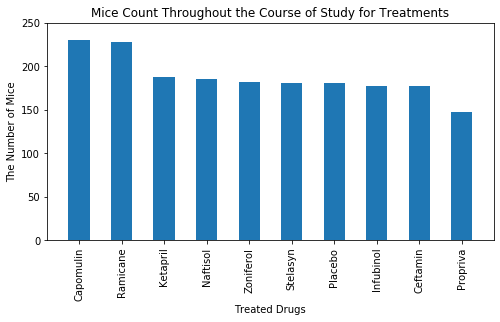

In [12]:
# Total number of mice for each treatment throughout the timepoints
mice_regimen = mice_time_regimen.sum(level='Drug Regimen')
mice_regimen.sort_values(ascending=False, inplace=True)

# Generate a bar plot showing the number of mice throughout the timepoints for each treatment
# Using dataframe.plot
df_bar = mice_regimen.plot(kind='bar', rot='vertical', figsize=(8,4))
df_bar.set_xlabel("Treated Drugs")
df_bar.set_ylabel("The Number of Mice")
df_bar.set_title("Mice Count Throughout the Course of Study for Treatments")
df_bar.set_xlim(-0.75, len(mice_regimen.index)-0.25)
df_bar.set_ylim(0, 250)

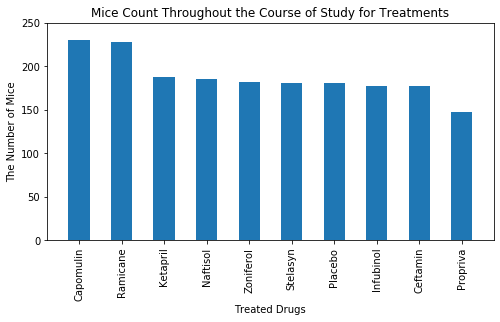

In [13]:
# Generate a bar plot showing the number of mice throughout the timepoints  for each treatment
# Using matplot.plt
xval = range(len(mice_regimen.index))
plt.figure(figsize=(8,4))
plt.bar(xval, mice_regimen.values, width=0.5)
plt.xlabel("Treated Drugs")
plt.ylabel("The Number of Mice")
plt.title("Mice Count Throughout the Course of Study for Treatments")
plt.xticks(xval, mice_regimen.index, rotation="vertical")
plt.xlim(-0.75, len(mice_regimen.index)-0.25)
plt.ylim(0, 250)
plt.show()

## Pie Plots <a id='Pie_Plot'></a>

* Showing the distribution of female or male mice in the study.


In [14]:
# distribution of female versus male mice using pandas
female_male = cleaned_df.groupby('Sex')['Mouse ID'].nunique()
female_male

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'The Distrubution of Mice Sex')

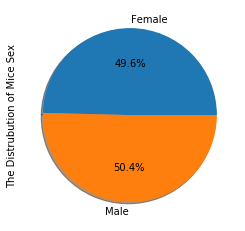

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using dataframe plot
pie_chart = female_male.plot(kind='pie', y=female_male.values, autopct='%1.1f%%', shadow=True)
pie_chart.set_ylabel("The Distrubution of Mice Sex")

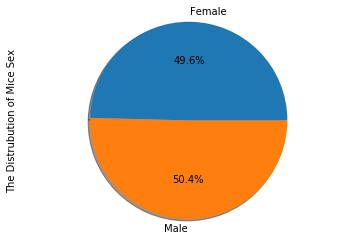

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = female_male.keys()
values = female_male.values
plt.pie(values, labels=labels, autopct='%1.1f%%', shadow=True)
plt.ylabel("The Distrubution of Mice Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots <a id='Box_Plot'></a>

Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [17]:
# For a treatment(drug), find the tumor volume at the final time of each mouse which was treated by the drug
def find_volume_drug(df, final_time, drug):
    vol = []
    for key,val in final_time[drug].items():
        df_val = df.loc[(df["Mouse ID"]==key) & (df["Timepoint"]==val),'Tumor Volume (mm3)'].values
        vol.append(df_val[0])
    return pd.Series(vol)

# Find final time for each mouse
final_time = cleaned_df.groupby(["Drug Regimen","Mouse ID"])['Timepoint'].max()

# Four treatments (drug regimens)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
            
# Set a dataframe of the final volumes for the treatments
final_vol = pd.DataFrame({
        drug : find_volume_drug(cleaned_df, final_time, drug)
        for drug in drug_list})

# Calculate the quartiles and IQR
quartiles_df = final_vol.quantile([.25,.5,.75])
iqr = quartiles_df.loc[0.75]-quartiles_df.loc[0.25]
quartiles_df = quartiles_df.append(iqr.rename('IQR'))
quartiles_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0.25,32.377357,31.560470,54.048608,48.722078
0.5,38.125164,36.561652,60.165180,59.851956
0.75,40.159220,40.659006,65.525743,64.299830
IQR,7.781863,9.098537,11.477135,15.577752


In [18]:
# Calculate the lower bound and upper bound
lower_b = quartiles_df.loc[0.25] - 1.5*quartiles_df.loc['IQR']
upper_b = quartiles_df.loc[0.75] + 1.5*quartiles_df.loc['IQR']

# Determine if there are any potential outliers
for drug in quartiles_df.columns:
    low = lower_b[drug]
    upp = upper_b[drug]
    lcnt = final_vol.loc[final_vol[drug]<low, drug].count()
    ucnt = final_vol.loc[final_vol[drug]>upp, drug].count()
    print(f"The number of (lower, upper) outliers of {drug} is ({lcnt},{ucnt}).")

The number of (lower, upper) outliers of Capomulin is (0,0).
The number of (lower, upper) outliers of Ramicane is (0,0).
The number of (lower, upper) outliers of Infubinol is (1,0).
The number of (lower, upper) outliers of Ceftamin is (0,0).


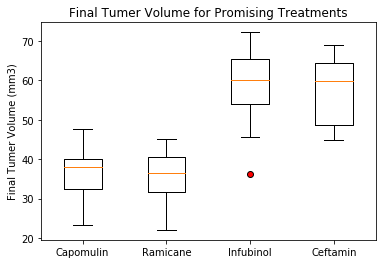

In [19]:
# Using Matplotlib, generate a box and whisker plot
four_vol = [final_vol[drug] for drug in drug_list]
outlierprops = dict(markerfacecolor='red', marker='o')
plt.boxplot(four_vol, labels=drug_list, flierprops=outlierprops)
plt.ylabel("Final Tumer Volume (mm3)")
plt.title("Final Tumer Volume for Promising Treatments")
plt.show()

## Line Plot <a id='Line_Plot'></a>

* Showing time point versus tumor volume for a single mouse treated with Capomulin.

In [20]:
# Set a dataframe for the results of Capomulin
capomulin_df = cleaned_df.loc[(cleaned_df['Drug Regimen']=='Capomulin')]

# Find mice IDs treated with Capomulin
mice_id_capomulin = capomulin_df['Mouse ID'].unique()
print(f"The mice treated with Capomulin are\n {mice_id_capomulin}")

The mice treated with Capomulin are
 ['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157']


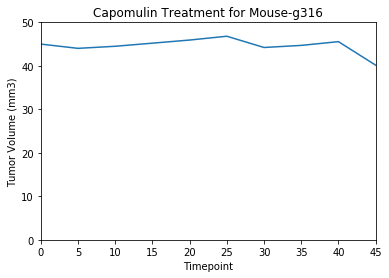

In [21]:
# Select one mouse ID, randomly,  and its data
mouse_id = mice_id_capomulin[st.randint.rvs(0,len(mice_id_capomulin))]
one_mouse_df = capomulin_df.loc[(capomulin_df['Mouse ID']==mouse_id)]

# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
xval = one_mouse_df['Timepoint']
yval = one_mouse_df['Tumor Volume (mm3)']
plt.plot(xval,yval)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin Treatment for Mouse-{mouse_id}")
plt.xlim(0,45)
plt.ylim(0,50)
plt.show()

## Scatter Plot <a id='Scatter_Plt'></a>

* Plot the mouse weight versus average tumor volume for the Capomulin treatment regimen.

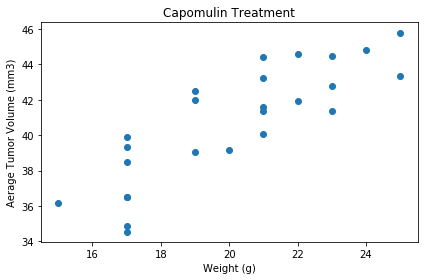

In [22]:
# Generate a scatter plot of, for each mouse, mouse weight versus average tumor volume for the Capomulin regimen
capomulin_vol = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
capomulin_wt = capomulin_df.groupby('Mouse ID')['Weight (g)'].min()
xval = capomulin_wt.values
yval = capomulin_vol.values
plt.scatter(xval, yval)
plt.xlabel('Weight (g)')
plt.ylabel('Aerage Tumor Volume (mm3)')
plt.title('Capomulin Treatment')
plt.tight_layout()
plt.show()

## Correlation and Regression <a id='Regression'></a>

Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.

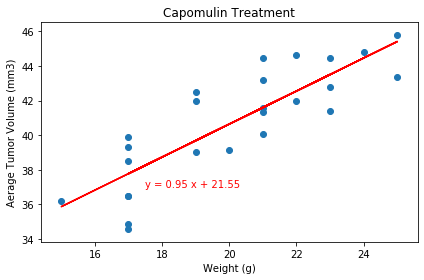

The Pearson (r, p) values are (0.84, 0.00)
The R-square is 0.71
The pvalue is 0.0


In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(mm,cc,rr,pp,ss) = st.linregress(xval,yval)
line_eq = "y = " + str(round(mm,2)) + " x + " + str(round(cc,2))
est_yval = mm*xval + cc
plt.plot(xval, est_yval, "r-")
plt.scatter(xval, yval)
plt.annotate(line_eq,(17.5,37), color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Aerage Tumor Volume (mm3)')
plt.title('Capomulin Treatment')
plt.tight_layout()
plt.show()
(pr_r, pr_p)=st.pearsonr(xval,yval)
print(f"The Pearson (r, p) values are ({pr_r:.2f}, {pr_p:.2f})")
print("The R-square is " + str(round(rr**2,2)))
print("The pvalue is " + str(round(pp,2)))